# Codes to reproduce all figures of the manuscript “Relative importance of composition structures and biologically meaningful logics in bipartite Boolean models of gene regulation”

Provided below are the codes to reproduce all of the figures in the manuscript in the following order:
1. Figures 2(c) and 2(d): log-log plot of the frequency distribution of the number of enhancers that are bound by different number of transciption factors
2. Figure 3(a) and Figure 3(b): Computing the overlap and making UpSet plots
3. Figure 4(a) and 4(b): Making the enrichment plots 
4. Supplementary Figures 1(a) and 1(b): frequency distribution of the number of enhancers that are bound by different number of transciption factors

Given below are all the packages to be imported for the codes to run. Please run this before running any other code in the notebook

In [3]:
#!pip3 install brokenaxes==0.2
#!pip3 install upsetplot

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from BF_compositions import *
import pandas as pd
from matplotlib import rc
from upsetplot import plot
from brokenaxes import brokenaxes

1. Figures 2(c) and 2(d): log-log plot of the frequency distribution of the number of enhancers that are bound by different number of transciption factors

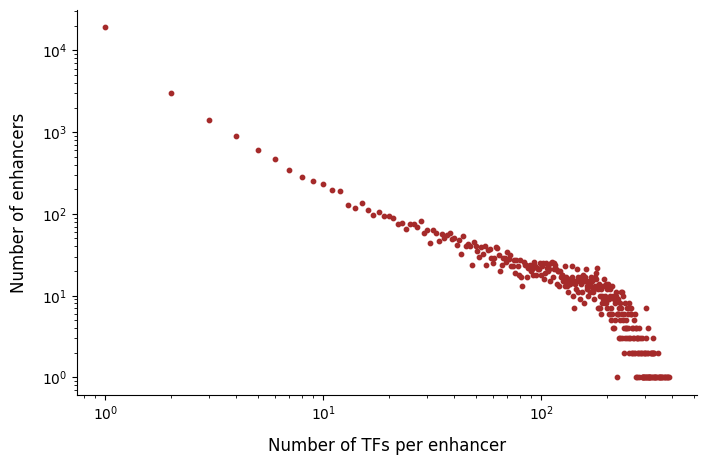

In [10]:
def generate_fig2 (subplot):
    if subplot == 'a':
        filename = '../DATA/hepg2_encode_enh_treg.tsv'
    elif subplot == 'b':
        filename = '../DATA/k562_encode_enh_treg.tsv'
    else:
        print ("Please enter valid subfigure: 'a' or 'b'")
        return None

    df = pd.read_csv(filename, sep = '\t')
    #Get the number of unique TRs binding at each enhancer
    num_tf = []
    tf_names = []
    bind_names = list(df['tfs_bound'])
    all_tfs_bind = []
    for i in range(len(bind_names)):
        tfs = bind_names[i]
        if tfs == tfs:
            uni_tf_name = list(set([ele for ele in tfs.split('|') if '*' not in ele]))
            if '' in uni_tf_name:
                uni_tf_name.remove('')
            num_tf += [len(uni_tf_name)]
            all_tfs_bind += uni_tf_name
        else:
            uni_tf_name = []
            num_tf += [0]

    Q1 = dict(Counter(num_tf))
    # Plotting the figure	
    fig = plt.figure(figsize=(8, 5))
    ax = plt.gca()
    x_points = [x+1 for x in Q1.keys()]
    ax.scatter(x_points, Q1.values(), color= 'brown', s = 10)
    ax.set_xlabel('Number of TFs per enhancer', labelpad = 10, fontsize = 12)
    ax.set_ylabel('Number of enhancers', labelpad = 10, fontsize = 12)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()
    return None

fig2 = generate_fig2 ('a')

2. Figure 3(a) and Figure 3(b): Computing the overlap and making UpSet plots



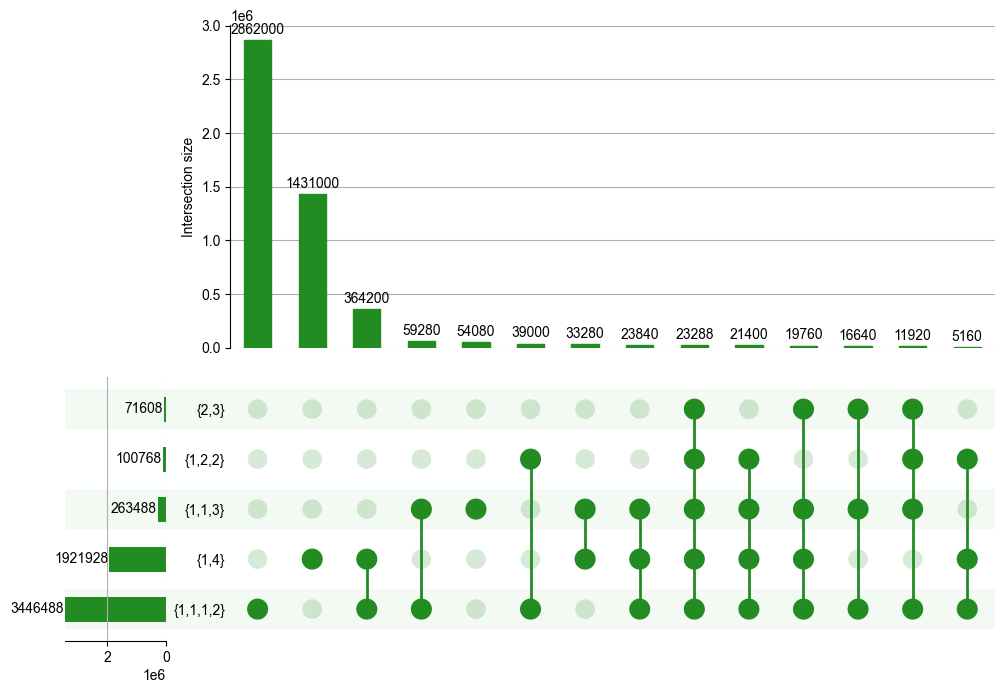

In [13]:
def generate_set_matrix(sets, set_names):
    import pandas as pd
    all_elems = list(set().union(*sets))
    df = pd.DataFrame([[e in st for st in sets] for e in all_elems], columns = set_names)
    df_up = df.groupby(set_names).size()
    return df_up

def generate_fig3 (subplot):
    if subplot == 'a':
      comp_struc_list = [[1,3],[2,2],[1,1,2]]
    elif subplot == 'b':
      comp_struc_list = [[1,4],[2,3],[1,1,3],[1,2,2],[1,1,1,2]]
    else:
      print ("Please enter valid subfigure: 'a' or 'b'")
      return None
  
    distinct_logics_dict = {'{' + ','.join([str(x) for x in comp_struc]) + '}' : set(generate.read_all_composed_BF(comp_struc)) for comp_struc in comp_struc_list}
    sets = list(distinct_logics_dict.values())
    set_names = list(distinct_logics_dict.keys())
    df = generate_set_matrix(sets, set_names)

    rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
    if subplot == 'a':
      fig = plt.figure(figsize=(6,4))
    elif subplot == 'b':
      fig = plt.figure(figsize=(12,8))
    plot(df, fig =fig, show_counts = True, sort_by = 'cardinality', facecolor="forestgreen", element_size=None)
    plt.show()
    return None
  
fig3 = generate_fig3('b')

3. Figure 4(a) and 4(b): Making the enrichment plots

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

def generate_fig4a(k):
  if k==5:
    xlim = 10
    res_width = 600
    bar_width = 1.1
  if k==4:
    xlim = 6
    res_width = 400
    bar_width = 1.1
  if k==3:
    xlim = 2
    res_width = 250
    bar_width = 1.1

  rand_df = pd.read_csv('../DATA/frac_rand.tsv', sep = '\t')
  rand_df = rand_df[rand_df['k']==k]
  #print(rand_df)
  cols = [col for col in rand_df.columns]
  emp_df = pd.read_csv('../DATA/frac_emp.tsv', sep = '\t')
  emp_df = emp_df[emp_df['k']==k]
  #print(emp_df)

  x_values = []
  x_label = 1
  emp_fracs = []
  for i,j in emp_df.iterrows():
      for col in cols[2:3]:
          emp_fracs.append(j[col])
          x_values.append(x_label)
          x_label += 1
      x_label += 1

  rand_fracs = []
  for i,j in rand_df.iterrows():
      for col in cols[2:3]:
          rand_fracs.append(j[col])

  colors = ['#D1D3D4']

  fig = go.Figure(data=[go.Bar(x=x_values, y=emp_fracs, marker_color=colors*len(emp_df), width = [bar_width]*len(x_values))])
  fig.add_trace(go.Scatter(x=x_values, y=rand_fracs, mode='markers', marker_color = 'black', marker_size = 8))

  fig.update_layout(plot_bgcolor='#fff', width=res_width, height=400, showlegend = False, font_size = 14)
  fig.update_yaxes(showline = True, linewidth = 1, linecolor = 'black', ticks='outside', showgrid=False, range = [0,1.05], dtick=0.2) #gridcolor='#eee', gridwidth=1.5
  fig.update_xaxes(showline=True, linewidth=1, linecolor='black', showticklabels=False, range=[0,xlim])#,mirror=True,ticks='outside')#, showticklabels=True)
  fig.update_traces(marker=dict(line=dict(width=0.3, color='black')))

  fig.show()
  return None

def generate_fig4b(k):
  if k==5:
    xlim = 25
    res_width = 900
    bar_width = 0.7
  if k==4:
    xlim = 15
    res_width = 600
    bar_width = 0.7
  if k==3:
    xlim = 5
    res_width = 310
    bar_width = 0.7

  rand_df = pd.read_csv('../DATA/frac_rand.tsv', sep = '\t')
  rand_df.drop(['frac_CS_EF'], axis = 1, inplace = True)
  rand_df = rand_df[rand_df['k']==k]
  print(rand_df)
  cols = [col for col in rand_df.columns]
  emp_df = pd.read_csv('../DATA/frac_emp.tsv', sep = '\t')
  emp_df.drop(['frac_CS_EF'], axis = 1, inplace = True)
  emp_df = emp_df[emp_df['k']==k]
  #print(emp_df)

  x_values = []
  x_label = 1
  emp_fracs = []
  for i,j in emp_df.iterrows():
      for col in cols[3:]:
          emp_fracs.append(j[col])
          x_values.append(x_label)
          x_label += 1
      x_label += 1

  rand_fracs = []
  for i,j in rand_df.iterrows():
      for col in cols[3:]:
          rand_fracs.append(j[col])

  #Make figure
  colors = ['#FF8AAE','#FFB72B','#5EE6EB','#56BBF1']

  fig = go.Figure(data=[go.Bar(x=x_values, y=emp_fracs, marker_color=colors*len(emp_df), width = [bar_width]*len(x_values))])
  fig.add_trace(go.Scatter(x=x_values, y=rand_fracs, mode='markers', marker_color = 'black', marker_size = 8))

  fig.update_layout(plot_bgcolor='#fff', width=res_width, height=400, showlegend = False, font_size = 14)
  fig.update_yaxes(showline = True, linewidth = 1, linecolor = 'black', ticks='outside', showgrid=False, range = [0,1.05], dtick=0.2) #gridcolor='#eee', gridwidth=1.5
  fig.update_xaxes(showline=True, linewidth=1, linecolor='black', showticklabels=False, range=[0,xlim])#,mirror=True,ticks='outside')#, showticklabels=True)
  fig.update_traces(marker=dict(line=dict(width=0.3, color='black')))

  fig.show()
  return None

def generate_fig4(subplot,k):
  if k < 3 or k > 5:
    print ("Enter valid k values (3,4, or 5).")
    return None
  if subplot == 'a':
    generate_fig4a(k)
  elif subplot == 'b':
    generate_fig4b(k)
  else:
    print ("Please enter valid subfigure: 'a' or 'b'")
    return None

fig4 = generate_fig4('a',4)

4. Supplementary Figures 1(a) and 1(b): frequency distribution of the number of enhancers that are bound by different number of transciption factors

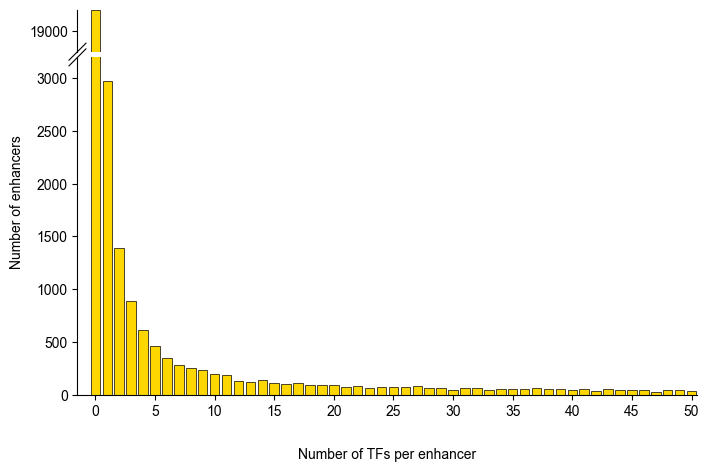

In [16]:
def generate_si_fig1 (subplot):
    if subplot == 'a':
      filename = '../DATA/hepg2_encode_enh_treg.tsv'
    elif subplot == 'b':
      filename = '../DATA/k562_encode_enh_treg.tsv'
    else:
      print ("Please enter valid subfigure: 'a' or 'b'")
      return None

    df = pd.read_csv(filename, sep = '\t') # load file into a dataframe

    #Get the number of unique TRs binding at each enhancer
    num_tf = []
    tf_names = []
    bind_names = list(df['tfs_bound'])
    all_tfs_bind = []
    for i in range(len(bind_names)):
      tfs = bind_names[i]
      if tfs == tfs:
        uni_tf_name = list(set([ele for ele in tfs.split('|') if '*' not in ele]))
        if '' in uni_tf_name:
          uni_tf_name.remove('')
        num_tf += [len(uni_tf_name)]
        all_tfs_bind += uni_tf_name
      else:
        uni_tf_name = []
        num_tf += [0]

    Q1 = dict(Counter(num_tf))

    #from 0 to 50 of TFs that can bind to an enhancer
    Q2 = {ele: Q1[ele] for ele in list(Q1.keys()) if ele in range(0,51)}
    fig = plt.figure(figsize=(8, 5))
    if subplot == 'a':
      baxes = brokenaxes(xlims = ((-1.5,50.5),), ylims = ((0,3200),(18800,19200)), hspace = 0.03)
    elif subplot == 'b':
      baxes = brokenaxes(xlims = ((-1.5,50.5),), ylims = ((0,2100),(9400,9600)), hspace = 0.03)
    fig = baxes
    fig.bar(Q2.keys(), Q2.values(), color= 'gold', linewidth = 0.5, edgecolor = 'black')
    fig.set_xlabel('Number of TFs per enhancer', labelpad = 20)
    baxes.set_ylabel('Number of enhancers', labelpad = 35)
    fig.set_xticks(np.arange(min(Q2.keys()), max(Q2.keys())+1, 5))
    plt.show()
    return None

si_fig1 = generate_si_fig1('a')